# Linear Mixed Effects Models in R

In this notebook, we'll explore how to use linear mixed effects models (LMMs) in R. LMMs are used when we have data with both fixed and random effects.

## Introduction to Linear Mixed Effects Models

Linear mixed effects models are an extension of linear regression that allow for the modeling of both fixed and random effects. Fixed effects are typically the parameters of interest, while random effects account for variability within groups or clusters.

### Libraries

Before we begin, let's load the necessary libraries:



In [14]:
install.packages("remotes")
remotes::install_github("dustinfife/flexplot")

Installing package into 'C:/Users/bgrau/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'remotes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bgrau\AppData\Local\Temp\RtmpwT6RSh\downloaded_packages


TH.data     (NA      -> 1.1-2 ) [CRAN]
multcomp    (NA      -> 1.4-25) [CRAN]
modeltools  (NA      -> 0.2-23) [CRAN]
matrixStats (NA      -> 1.0.0 ) [CRAN]
libcoin     (NA      -> 1.0-10) [CRAN]
prettyunits (1.1.1   -> 1.2.0 ) [CRAN]
pkgbuild    (NA      -> 1.4.2 ) [CRAN]
withr       (2.5.0   -> 2.5.1 ) [CRAN]
pkgload     (1.3.2.1 -> 1.3.3 ) [CRAN]
evaluate    (0.21    -> 0.22  ) [CRAN]
coin        (NA      -> 1.4-3 ) [CRAN]
strucchange (NA      -> 1.5-3 ) [CRAN]
party       (NA      -> 1.3-13) [CRAN]
ggsci       (NA      -> 3.0.0 ) [CRAN]
patchwork   (NA      -> 1.1.3 ) [CRAN]
plyr        (NA      -> 1.8.9 ) [CRAN]
cowplot     (NA      -> 1.1.1 ) [CRAN]


Installing 17 packages: TH.data, multcomp, modeltools, matrixStats, libcoin, prettyunits, pkgbuild, withr, pkgload, evaluate, coin, strucchange, party, ggsci, patchwork, plyr, cowplot

Installing packages into 'C:/Users/bgrau/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
     binary source needs_compilation
plyr  1.8.8  1.8.9              TRUE

  Binaries will be installed
package 'TH.data' successfully unpacked and MD5 sums checked
package 'multcomp' successfully unpacked and MD5 sums checked
package 'modeltools' successfully unpacked and MD5 sums checked
package 'matrixStats' successfully unpacked and MD5 sums checked
package 'libcoin' successfully unpacked and MD5 sums checked
package 'prettyunits' successfully unpacked and MD5 sums checked
package 'pkgbuild' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'evaluate' successfully unpacked and MD5 sums checked
package 'coin' successfully unpacked and MD5 sums checked
package 'strucchange' successfully unpacked and MD5 sums checked
package 'party' successfully unpacked and MD5 sums checked
package 'ggsci' succ

Installing package into 'C:/Users/bgrau/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



In [15]:
require(lme4, quietly = TRUE)      # For fitting linear mixed effects models
require(flexplot, quietly = TRUE)  # For visualizing LMM comparisons
require(lmerTest, quietly = TRUE)  # For model p-values
require(ggplot2, quietly = TRUE)   # For data visualization
require(tidyverse, quietly = TRUE) # For data manipulation



Attaching package: 'flexplot'


The following object is masked from 'package:ggplot2':

    flip_data




In [3]:
EEE_data <- read_csv('C:\\Users\\bgrau\\GitHub\\ieeg_affect\\EEE\\qualtrics\\data\\pilot_clean.csv')

EEE_data$highcue_indx <- factor(EEE_data$highcue_indx)
EEE_data$val_type <- factor(EEE_data$val_type)
EEE_data$subj <- factor(EEE_data$subj)
EEE_data$trial <- factor(EEE_data$trial)
EEE_data$highcue_indx <- factor(EEE_data$highcue_indx)
EEE_data$group <- factor(EEE_data$group)


head(EEE_data)


Rows: 7872 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Theme, Category, Source
dbl (42): subj, group, trial, highcue_indx, img_rate, exp_rate, val_type, cu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


subj,group,trial,highcue_indx,img_rate,exp_rate,val_type,cue_observed_std,cue_value_1,cue_value_2,⋯,Valence_mean_women,Valence_SD_women,Valence_N_women,Arousal_mean_men,Arousal_SD_men,Arousal_N_men,Arousal_mean_women,Arousal_SD_women,Arousal_N_women,Valence_gender_difference
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,-1,60,55,1,9.370816,58.08311,46.65535,⋯,78.29457,19.76545,43,44.55782,27.08606,49,44.96855,24.80370,53,6.4554932
3,1,2,-1,55,50,1,8.068631,41.25959,55.65268,⋯,68.62745,22.27282,51,47.95918,27.77069,49,63.03030,26.58377,55,0.2063984
3,1,3,1,40,45,3,13.638562,53.85315,48.16503,⋯,25.59524,14.20068,56,40.81633,28.27224,49,40.38462,27.28574,52,1.4417989
3,1,4,-1,70,65,1,13.573728,70.97096,89.56748,⋯,84.96732,15.72503,51,41.83673,27.66417,49,41.81818,26.81148,55,5.1427589
3,1,5,1,95,90,1,5.583210,92.80905,98.23677,⋯,92.63566,11.67365,43,60.20408,24.48930,49,64.15094,31.58834,53,5.5666934
3,1,6,-1,50,35,2,8.707814,37.72575,35.12892,⋯,50.57471,10.33810,58,11.34752,19.69158,47,10.57692,19.53402,52,0.1959248


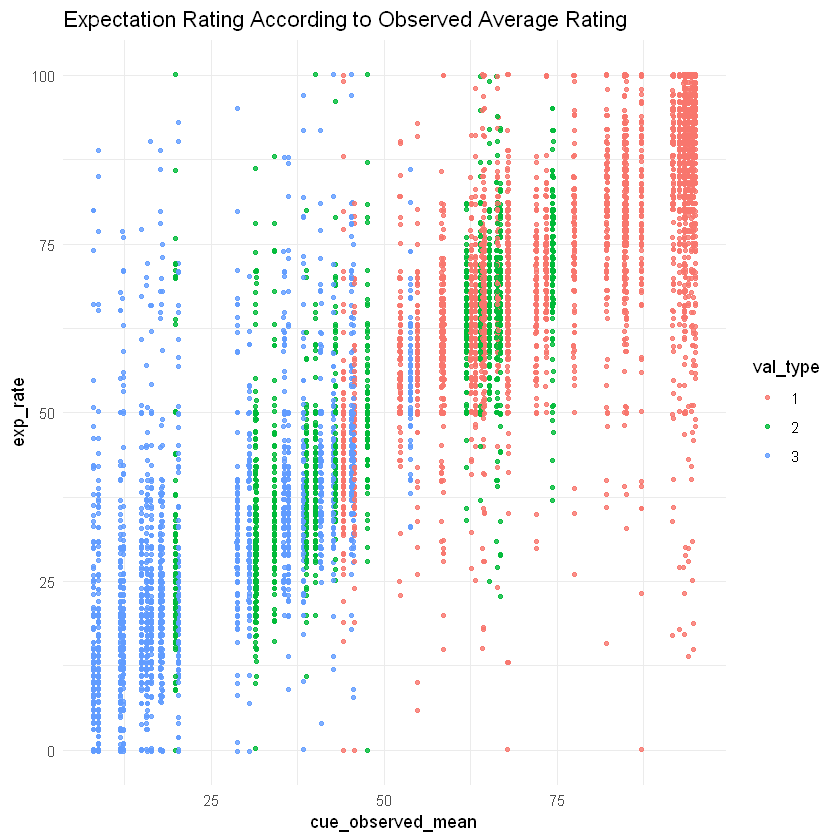

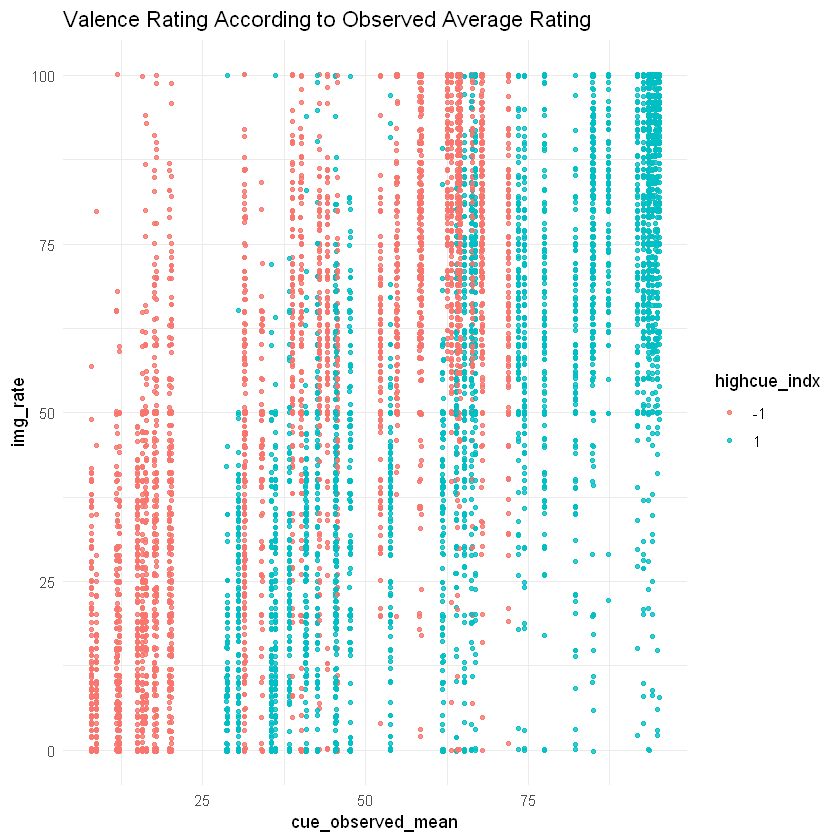

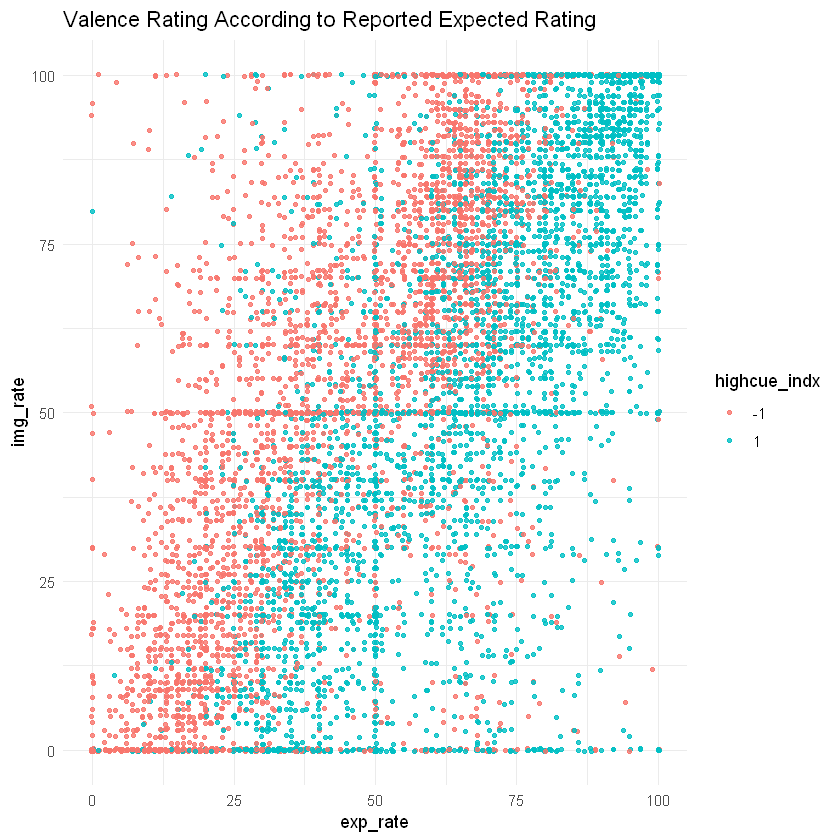

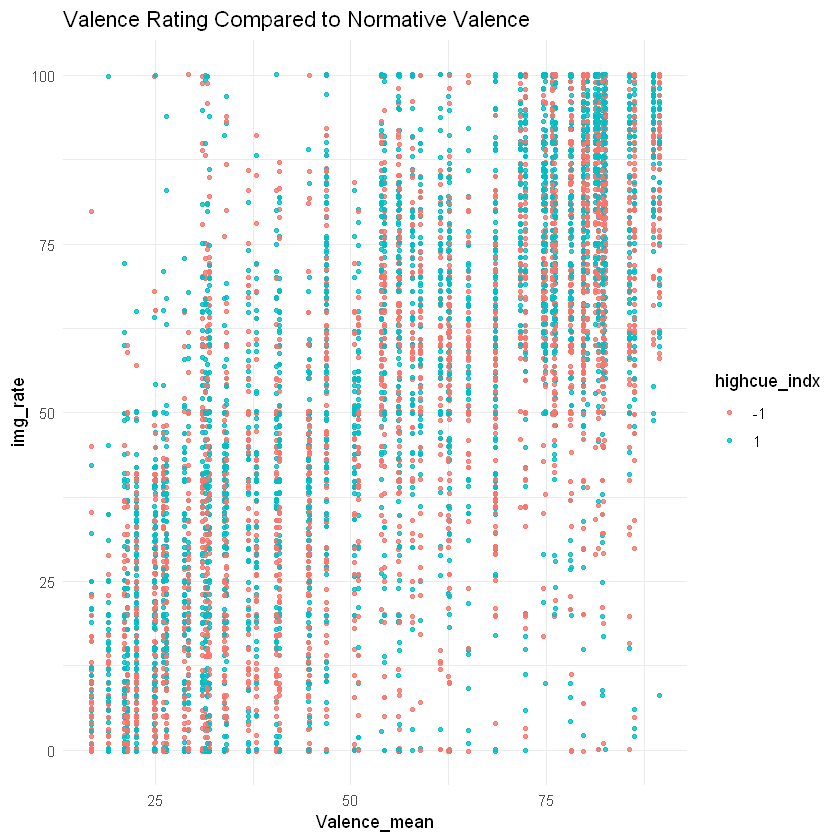

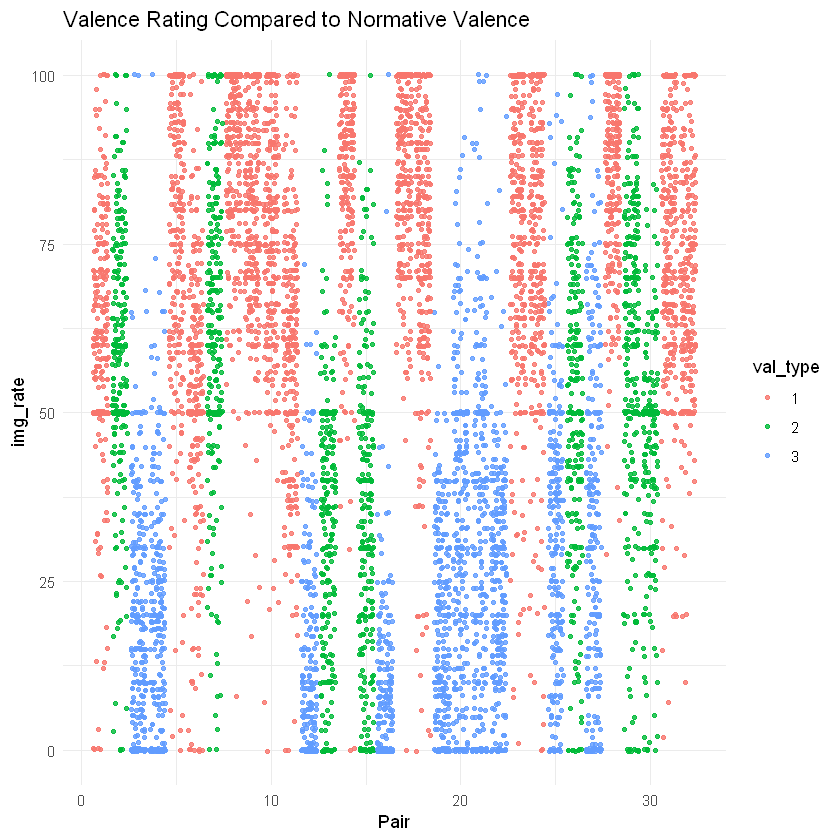

In [4]:
ggplot(data = EEE_data,
    aes(x = cue_observed_mean,
        y = exp_rate,
        color = val_type))+
  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+# to add some random noise for plotting purposes
  theme_minimal()+
  labs(title = 'Expectation Rating According to Observed Average Rating')

  ggplot(data = EEE_data,
    aes(x = cue_observed_mean,
        y = img_rate,
        # color = val_type))+
        color = highcue_indx))+

  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+# to add some random noise for plotting purposes
  theme_minimal()+
  labs(title = 'Valence Rating According to Observed Average Rating')

ggplot(data = EEE_data,
    aes(x = exp_rate,
        y = img_rate,
        # color = val_type))+
        color = highcue_indx))+
  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+# to add some random noise for plotting purposes
  theme_minimal()+
  labs(title = 'Valence Rating According to Reported Expected Rating')

  ggplot(data = EEE_data,
    aes(x = Valence_mean,
        y = img_rate,
        # color = val_type))+

        color = highcue_indx))+
  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+# to add some random noise for plotting purposes
  theme_minimal()+
  labs(title = 'Valence Rating Compared to Normative Valence')

ggplot(data = EEE_data,
    aes(x = Pair,
        y = img_rate,
        # shape = ,

        color = val_type))+
  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+# to add some random noise for plotting purposes
  theme_minimal()+
  labs(title = 'Valence Rating Compared to Normative Valence')


Correlation matrix not shown by default, as p = 125 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: img_rate ~ Image + cue_observed_mean + (1 + highcue_indx | Image) +  
    (subj)
   Data: EEE_data

REML criterion at convergence: 67623.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3400 -0.5941  0.0155  0.6114  4.7563 

Random effects:
 Groups   Name          Variance Std.Dev. Corr 
 Image    (Intercept)   443.1885 21.0520       
          highcue_indx1   0.6842  0.8271  -0.11
 Residual               323.4659 17.9852       
Number of obs: 7872, groups:  Image, 64

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        4.076e+01  4.789e+00  1.040e+02   8.511 1.40e-13 ***
Image              2.615e-03  8.760e-03  6.022e+01   0.299 0.766346    
cue_observed_mean  1.620e-01  1.482e-02  6.222e+01  10.929 4.11e-16 ***
subj2              4.078e+00  3.181e+00  7.596e+03   1.282 0.199887    
subj3              2.125e+00  3.181e+00

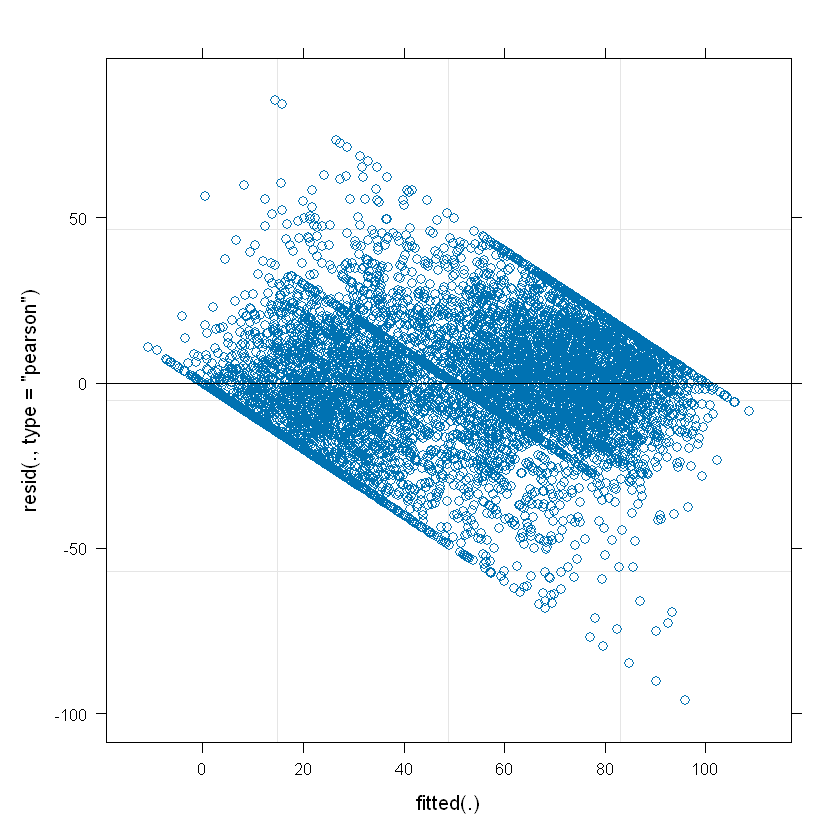

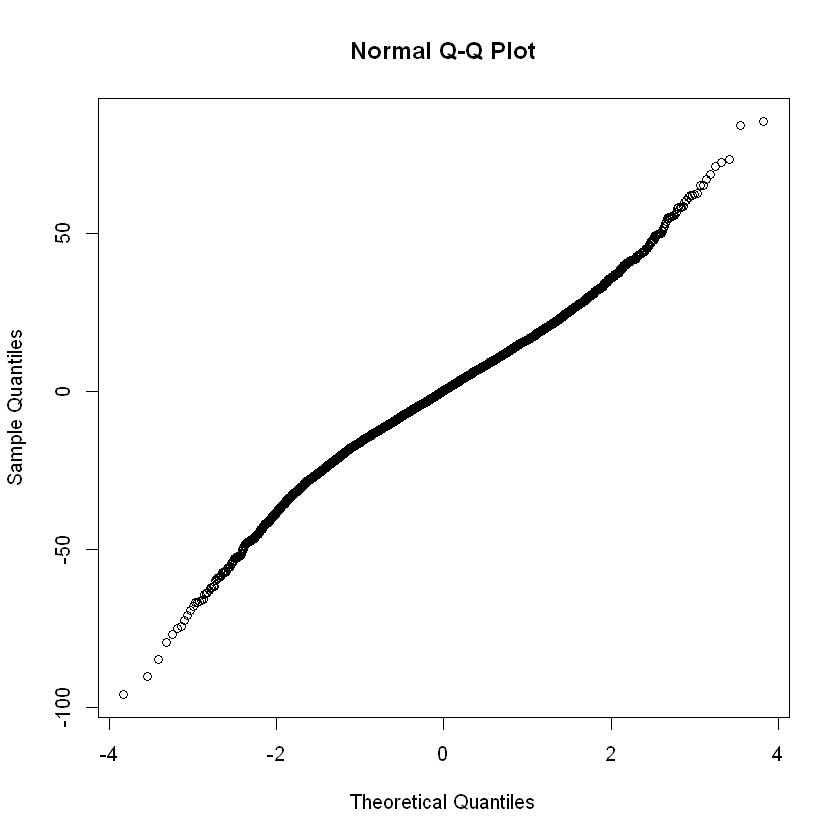

In [6]:
lmm_model <- lmer(img_rate ~ Image + cue_observed_mean + (1 + highcue_indx|Image) + (subj), data = EEE_data)

summary(lmm_model)
# Residuals vs. Fitted plot
plot(lmm_model, which = 1)

# QQ plot
qqnorm(residuals(lmm_model))


In [10]:
baseline <- lmer(img_rate ~ 1 + (1|Image), data = EEE_data)
icc(baseline)

visualize(baseline)

ERROR: Error in icc(baseline): could not find function "icc"
